<a href="https://colab.research.google.com/github/LorenFiorini/ideal-octo-spork/blob/main/plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 135, "display.max_columns", 135)

In [2]:
url = "https://raw.githubusercontent.com/LorenFiorini/ideal-octo-spork/main/DataRacing2022_datasets/train.csv"
df = pd.read_csv(url)
df

,id,target_reg,KATEGORIKUS_VALTOZO_2014,KATEGORIKUS_VALTOZO_2015,KATEGORIKUS_VALTOZO_2016,MEGYE_2014,MEGYE_2015,MEGYE_2016,SZEKHELY_IR_SZAM_2014,SZEKHELY_IR_SZAM_2015,SZEKHELY_IR_SZAM_2016,aktelh_2014,aktelh_2015,aktelh_2016,aktsajt_2014,aktsajt_2015,aktsajt_2016,alakul_ev,arbevert_2014,arbevert_2015,arbevert_2016,arbevexp_2014,arbevexp_2015,arbevexp_2016,befpue_2014,befpue_2015,befpue_2016,begyeb_2014,begyeb_2015,begyeb_2016,celtart_2014,celtart_2015,celtart_2016,eredadel_2014,eredadel_2015,eredadel_2016,eredadoz_2014,eredadoz_2015,eredadoz_2016,eredpenz_2014,eredpenz_2015,eredpenz_2016,eredtar_2014,eredtar_2015,eredtar_2016,ereduzem_2014,ereduzem_2015,ereduzem_2016,ertpapir_2014,ertpapir_2015,ertpapir_2016,hoskot01_2014,hoskot01_2015,hoskot01_2016,hoskot_2014,hoskot_2015,hoskot_2016,immat_2014,immat_2015,immat_2016,jetok_2014,jetok_2015,jetok_2016,kecs_2014,kecs_2015,kecs_2016,keszl_2014,keszl_2015,keszl_2016,kovet_2014,kovet_2015,kovet_2016,letszam_2014,letszam_2015,letszam_2016,merlfoo_2014,merlfoo_2015,merlfoo_2016,penzeszk_2014,penzeszk_2015,penzeszk_2016,ranyag_2014,ranyag_2015,ranyag_2016,regyeb_2014,regyeb_2015,regyeb_2016,rovkot01_2014,rovkot01_2015,rovkot01_2016,rovkot_2014,rovkot_2015,rovkot_2016,rszem_2014,rszem_2015,rszem_2016,sajattok_2014,sajattok_2015,sajattok_2016,targyie_2014,targyie_2015,targyie_2016,GAZDALKODASI_FORMA_2014_fo_kategoria,GAZDALKODASI_FORMA_2014_1_alkategoria,GAZDALKODASI_FORMA_2014_2_alkategoria,GAZDALKODASI_FORMA_2015_fo_kategoria,GAZDALKODASI_FORMA_2015_1_alkategoria,GAZDALKODASI_FORMA_2015_2_alkategoria,GAZDALKODASI_FORMA_2016_fo_kategoria,GAZDALKODASI_FORMA_2016_1_alkategoria,GAZDALKODASI_FORMA_2016_2_alkategoria,KKV_BESOROLAS_2014_fo_kategoria,KKV_BESOROLAS_2014_1_alkategoria,KKV_BESOROLAS_2014_2_alkategoria,KKV_BESOROLAS_2015_fo_kategoria,KKV_BESOROLAS_2015_1_alkategoria,KKV_BESOROLAS_2015_2_alkategoria,KKV_BESOROLAS_2016_fo_kategoria,KKV_BESOROLAS_2016_1_alkategoria,KKV_BESOROLAS_2016_2_alkategoria,agazat_2014_fo_kategoria,agazat_2014_1_alkategoria,agazat_2014_2_alkategoria,agazat_2014_3_alkategoria,agazat_2015_fo_kategoria,agazat_2015_1_alkategoria,agazat_2015_2_alkategoria,agazat_2015_3_alkategoria,agazat_2016_fo_kategoria,agazat_2016_1_alkategoria,agazat_2016_2_alkategoria,agazat_2016_3_alkategoria
0,1,1907229.0,0,0,0,Győr-Moson-Sopron,Győr-Moson-Sopron,Győr-Moson-Sopron,zipcode_1,zipcode_1,zipcode_1,457724.0,586098.0,643830.0,535126.0,849583.0,1234907.0,1976.0,13983828.0,12699378.0,11432950.0,1382989.0,1700751.0,1529118.0,1855172.0,1849289.0,1839898.0,15456185.0,15568368.0,19590889.0,1490863.0,2806727.0,3665800.0,939106.0,773314.0,703532.0,706406.0,433306.0,500046.0,-145397.0,35709.0,-83352.0,37983621.0,55695087.0,89228704.0,-2661421.0,-2520379.0,786884.0,0.0,0.0,0.0,952490.0,521178.0,2885261.0,48333543.0,45717629.0,45942043.0,132219.0,103981.0,84122.0,7520242.0,7520242.0,7520242.0,5547891.0,5849322.0,5686293.0,1395646.0,1567766.0,1798279.0,9012948.0,7550810.0,6199791.0,1845.0,1849.0,1845.0,121166809.0,145682514.0,170549985.0,1181661.0,3878508.0,3592889.0,14700476.0,12925752.0,13101480.0,2144006.0,2135752.0,1412180.0,9752906.0,3854551.0,5805061.0,19908755.0,27579737.0,17326862.0,10244187.0,10726882.0,11271908.0,13450028.0,13883334.0,14386576.0,107131440.0,130146063.0,156391175.0,P,P,A9,P,P,A9,P,P,A9,7-R,A,A,7-R,A,A,7-R,A,A,A9,9,P,A,A9,9,P,A,A9,9,P,A
1,2,0.0,0,0,0,Pest,Pest,Pest,zipcode_521,zipcode_521,zipcode_521,49.0,720.0,421.0,0.0,0.0,0.0,2005.0,41717.0,51525.0,60916.0,0.0,0.0,0.0,0.0,0.0,0.0,104.0,9346.0,0.0,0.0,0.0,0.0,7723.0,3361.0,56.0,6950.0,3024.0,-66.0,22.0,-110.0,-428.0,0.0,0.0,0.0,7701.0,3471.0,484.0,0.0,0.0,0.0,0.0,5026.0,3693.0,0.0,5026.0,3693.0,0.0,0.0,338.0,5497.0,5497.0,5497.0,2536.0,1891.0,3463.0,0.0,0.0,0.0,5200.0,6087.0,5327.0,7.0,6.0,6.0,32023.0,44129.0,40447.0,23968.0,27858.0,26844.0,19031.0,35572.0,45404.0,1059.0,9354.0,1059.0,1724.0,4614.0,3496.0,1724.0,5778.0,3496.0,11494.0,10583.0,10506.0,30300.0,33324.0,33258.0,2806.0,9464.0,7518.0,P,P,x,P,P,x,P,P,x,P,P,

In [73]:
cols = df.columns.values
row = ['2014', '2015', '2016']
col = [c.replace('_2014', '') for c in cols if ('2015' not in c) and ('2016' not in c)]

data = dict()
for year in row:
    d = []
    for j in range(len(cols)): #df.iloc[0]:
        con = 0
        for y in row:
            con |= (y in cols[j])
        if year in cols[j] or not con:
            '''
            try:
                d.append(float(df.iloc[0][j]))
            except:'''
            d.append(df.iloc[0][j])
    #d = pd.Series(d)
    #pd.to_numeric(d, errors = 'ignore')
    data[int(year)] = d

#row = [int(r) for r in row]

df0 = pd.DataFrame(data, index = col).T
for a in df0:
    pd.to_numeric(a, errors = 'ignore')

df0

,id,target_reg,KATEGORIKUS_VALTOZO,MEGYE,SZEKHELY_IR_SZAM,aktelh,aktsajt,alakul_ev,arbevert,arbevexp,befpue,begyeb,celtart,eredadel,eredadoz,eredpenz,eredtar,ereduzem,ertpapir,hoskot01,hoskot,immat,jetok,kecs,keszl,kovet,letszam,merlfoo,penzeszk,ranyag,regyeb,rovkot01,rovkot,rszem,sajattok,targyie,GAZDALKODASI_FORMA_fo_kategoria,GAZDALKODASI_FORMA_1_alkategoria,GAZDALKODASI_FORMA_2_alkategoria,KKV_BESOROLAS_fo_kategoria,KKV_BESOROLAS_1_alkategoria,KKV_BESOROLAS_2_alkategoria,agazat_fo_kategoria,agazat_1_alkategoria,agazat_2_alkategoria,agazat_3_alkategoria
2014,1,1907229.0,0,Győr-Moson-Sopron,zipcode_1,457724.0,535126.0,1976.0,13983828.0,1382989.0,1855172.0,15456185.0,1490863.0,939106.0,706406.0,-145397.0,37983621.0,-2661421.0,0.0,952490.0,48333543.0,132219.0,7520242.0,5547891.0,1395646.0,9012948.0,1845.0,121166809.0,1181661.0,14700476.0,2144006.0,9752906.0,19908755.0,10244187.0,13450028.0,107131440.0,P,P,A9,7-R,A,A,A9,9,P,A
2015,1,1907229.0,0,Győr-Moson-Sopron,zipcode_1,586098.0,849583.0,1976.0,12699378.0,1700751.0,1849289.0,15568368.0,2806727.0,773314.0,433306.0,35709.0,55695087.0,-2520379.0,0.0,521178.0,45717629.0,103981.0,7520242.0,5849322.0,1567766.0,7550810.0,1849.0,145682514.0,3878508.0,12925752.0,2135752.0,3854551.0,27579737.0,10726882.0,13883334.0,130146063.0,P,P,A9,7-R,A,A,A9,9,P,A
2016,1,1907229.0,0,Győr-Moson-Sopron,zipcode_1,643830.0,1234907.0,1976.0,11432950.0,1529118.0,1839898.0,19590889.0,3665800.0,703532.0,500046.0,-83352.0,89228704.0,786884.0,0.0,2885261.0,45942043.0,84122.0,7520242.0,5686293.0,1798279.0,6199791.0,1845.0,170549985.0,3592889.0,13101480.0,1412180.0,5805061.0,17326862.0,11271908.0,14386576.0,156391175.0,P,P,A9,7-R,A,A,A9,9,P,A


In [81]:
'''
ls = df.columns.values
for i in range(len(ls)):
    print(ls[i])
    if '2014' in ls[i]:
        i += 2'''
a = df.columns.values
b = df.dtypes
n = len(a)
ans = []

for i in range(n):
    if b[i] != object and ('2015' not in a[i]) and ('2016' not in a[i]) :
        s = a[i].replace('_2014', '')
        ans.append(s)
ans

['id',
 'target_reg',
 'KATEGORIKUS_VALTOZO',
 'aktelh',
 'aktsajt',
 'alakul_ev',
 'arbevert',
 'arbevexp',
 'befpue',
 'begyeb',
 'celtart',
 'eredadel',
 'eredadoz',
 'eredpenz',
 'eredtar',
 'ereduzem',
 'ertpapir',
 'hoskot01',
 'hoskot',
 'immat',
 'jetok',
 'kecs',
 'keszl',
 'kovet',
 'letszam',
 'merlfoo',
 'penzeszk',
 'ranyag',
 'regyeb',
 'rovkot01',
 'rovkot',
 'rszem',
 'sajattok',
 'targyie']

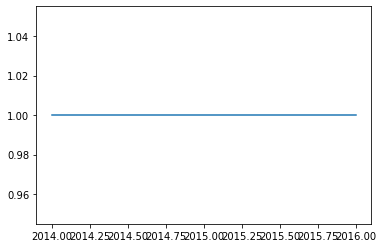

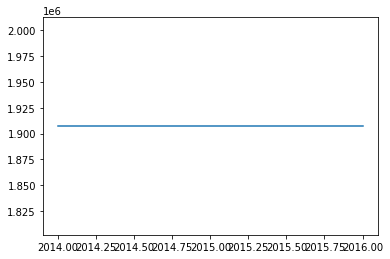

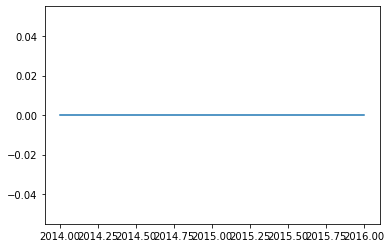

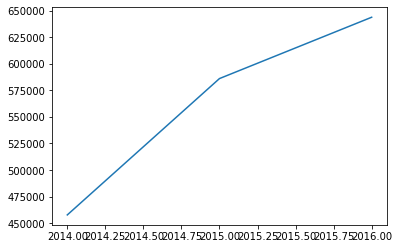

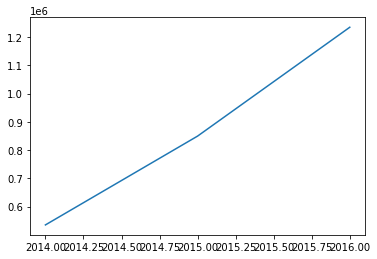

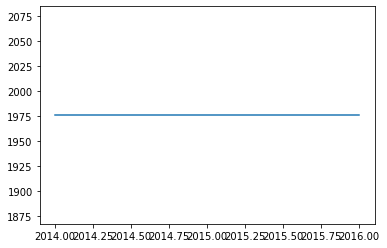

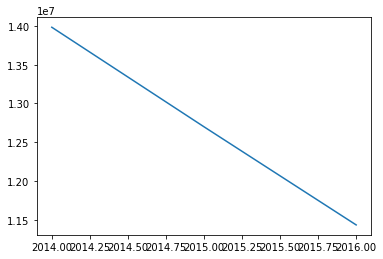

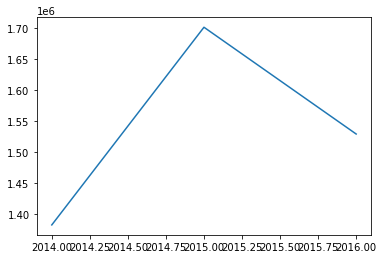

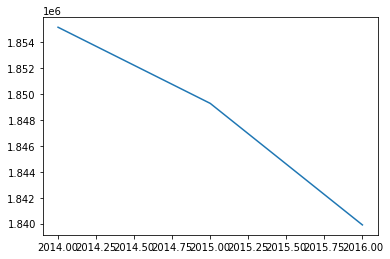

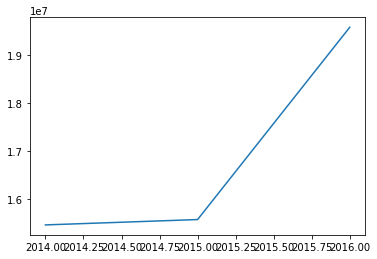

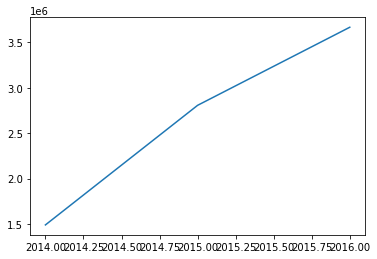

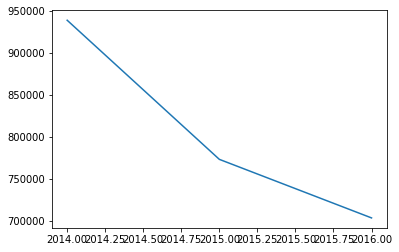

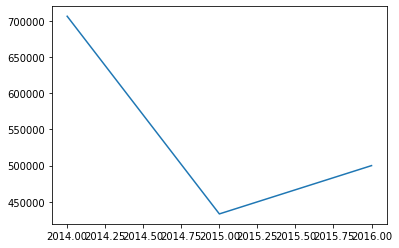

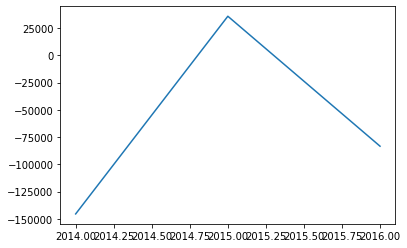

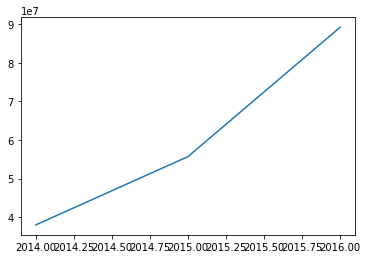

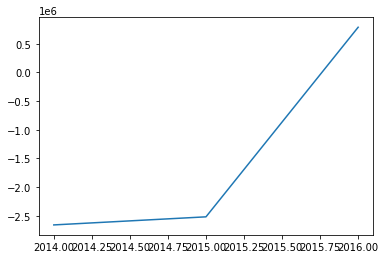

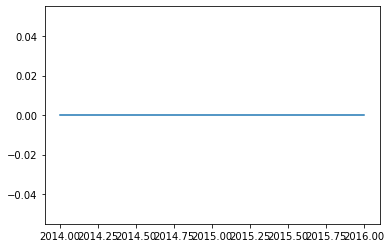

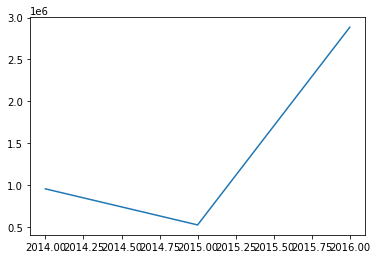

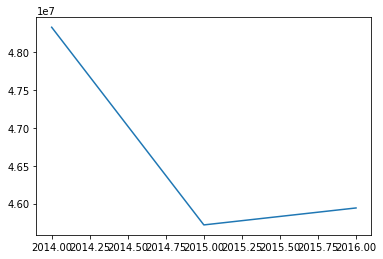

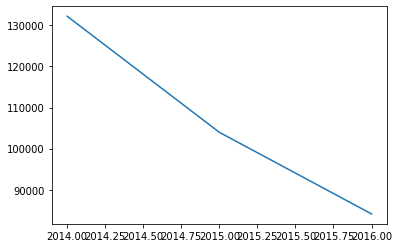

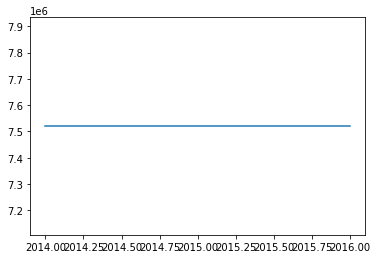

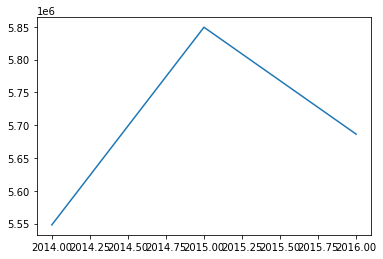

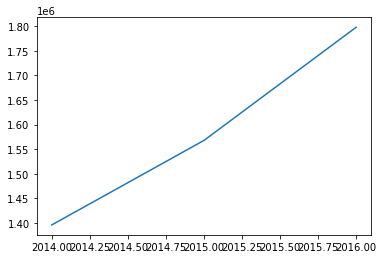

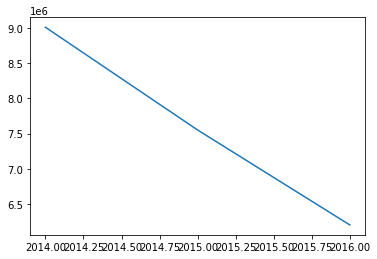

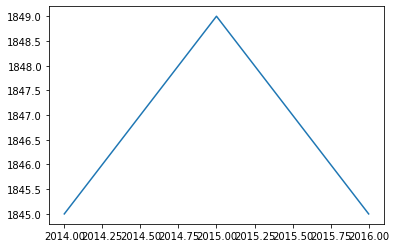

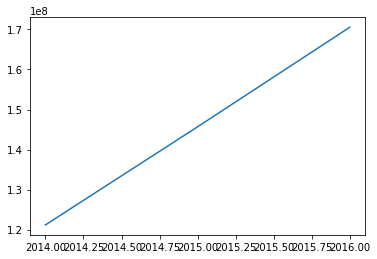

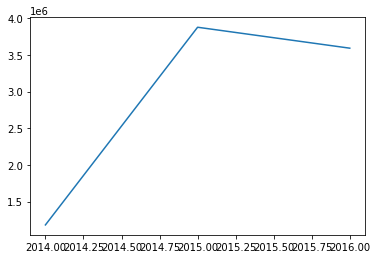

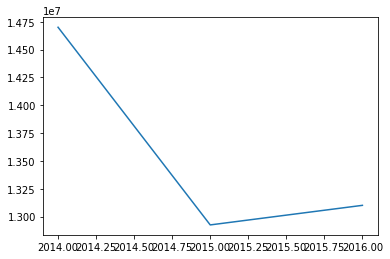

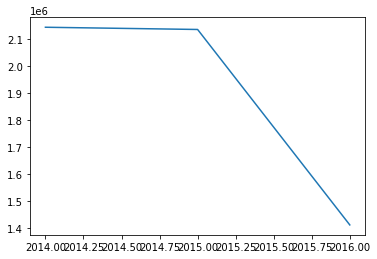

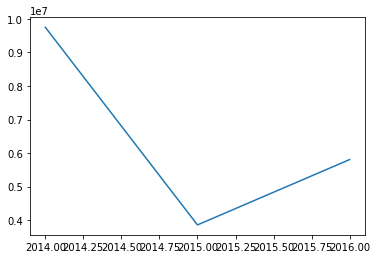

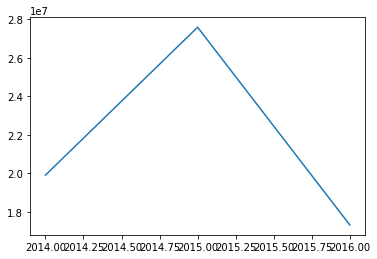

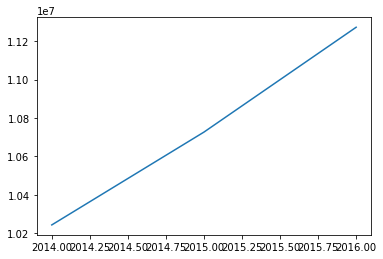

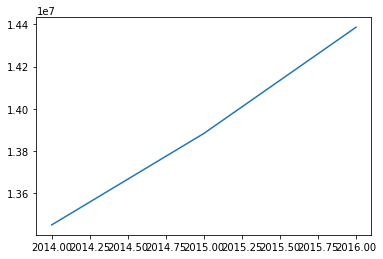

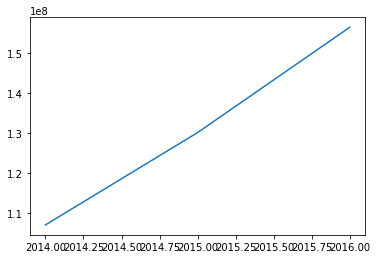

In [85]:

for c in df0:    
    if c in ans:
        plt.plot(df0[c])
        plt.show()


In [45]:
'''for c in df.columns.values:
    print(c)'''

res = df.index[df['target_reg'] != 0].tolist()
len(res)


8373

In [3]:
col = ['KATEGORIKUS_VALTOZO',
#      'MEGYE',
#      'SZEKHELY_IR_SZAM',
      'aktelh',
      'aktsajt',
      'arbevert',
      'arbevexp',
      'befpue',
      'begyeb',
      'celtart',
      'eredadel',
      'eredadoz',
      'eredpenz',
      'eredtar',
      'ereduzem',
      'ertpapir',
      'hoskot',
      'hoskot01',
      'immat',
      'jetok',
      'kecs',
      'keszl',
      'kovet',
      'letszam',
      'merlfoo',
      'penzeszk',
      'ranyag',
      'regyeb',
      'rovkot',
      'rovkot01',
      'rszem',
      'sajattok',
      'targyie'
     ]
sz = max(len(a) for a in col) + 4

for a in col:
    ls = df.index[(df[a + '_2014'] != df[a + '_2015']) | (df[a+'_2014'] != df[a+'_2016'])].tolist()
    print(f"{a : <{sz}}{str(len(ls)): >7}")
    


KATEGORIKUS_VALTOZO        474
aktelh                   25805
aktsajt                   7816
arbevert                 33170
arbevexp                 10659
befpue                    5095
begyeb                   32140
celtart                   2584
eredadel                 33156
eredadoz                 33171
eredpenz                 30519
eredtar                  26134
ereduzem                 33178
ertpapir                  3246
hoskot                   17119
hoskot01                 12137
immat                    13796
jetok                     5976
kecs                     32707
keszl                    25359
kovet                    33005
letszam                  25133
merlfoo                  33178
penzeszk                 33154
ranyag                   33178
regyeb                   33070
rovkot                   33157
rovkot01                 31412
rszem                    33144
sajattok                 33160
targyie                  32534
